In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Alp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**EDA**

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


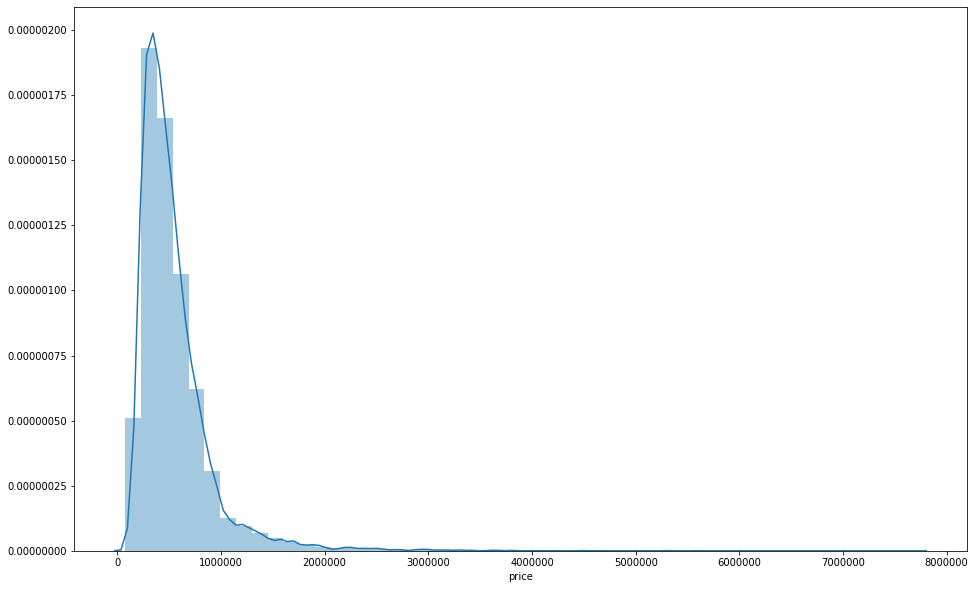

In [9]:
plt.figure(figsize = (16, 10))
sns.distplot(df['price']);

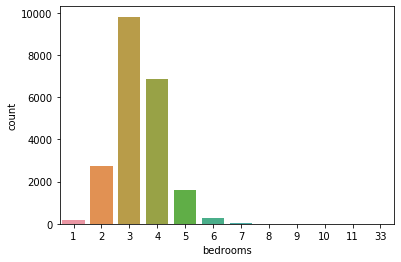

In [10]:
sns.countplot(df['bedrooms']);

In [11]:
df[df['bedrooms']==33]  # yazim hatasiymis

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,...,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [12]:
df[df['bedrooms']==11] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,...,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [13]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,-0.017,0.001,0.005,-0.012,-0.132,0.019,-0.003,0.012,-0.024,0.008,-0.011,-0.005,0.022,-0.017,-0.008,-0.002,0.021,-0.003,-0.139
price,-0.017,1.000,0.309,0.526,0.702,0.090,0.257,0.266,0.397,0.036,0.668,0.605,0.324,0.054,0.126,-0.053,0.307,0.022,0.585,0.083
bedrooms,0.001,0.309,1.000,0.515,0.578,0.032,0.178,-0.007,0.080,0.026,0.357,0.479,0.303,0.156,0.018,-0.154,-0.010,0.132,0.393,0.031
bathrooms,0.005,0.526,0.515,1.000,0.756,0.088,0.503,0.064,0.188,-0.126,0.666,0.687,0.283,0.507,0.051,-0.205,0.024,0.225,0.570,0.088
sqft_living,-0.012,0.702,0.578,0.756,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.876,0.435,0.318,0.055,-0.200,0.052,0.241,0.756,0.184
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.115,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.718
floors,0.019,0.257,0.178,0.503,0.354,-0.005,1.000,0.024,0.029,-0.264,0.459,0.524,-0.246,0.489,0.006,-0.060,0.049,0.126,0.280,-0.011
waterfront,-0.003,0.266,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.087,0.031
view,0.012,0.397,0.080,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.252,0.168,0.277,-0.054,0.104,0.085,0.006,-0.078,0.281,0.073
condition,-0.024,0.036,0.026,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.147,-0.159,0.174,-0.362,-0.061,0.003,-0.015,-0.106,-0.093,-0.003


In [14]:
df.corr()['price'].sort_values()

zipcode         -0.053
id              -0.017
long             0.022
condition        0.036
yr_built         0.054
sqft_lot15       0.083
sqft_lot         0.090
yr_renovated     0.126
floors           0.257
waterfront       0.266
lat              0.307
bedrooms         0.309
sqft_basement    0.324
view             0.397
bathrooms        0.526
sqft_living15    0.585
sqft_above       0.605
grade            0.668
sqft_living      0.702
price            1.000
Name: price, dtype: float64

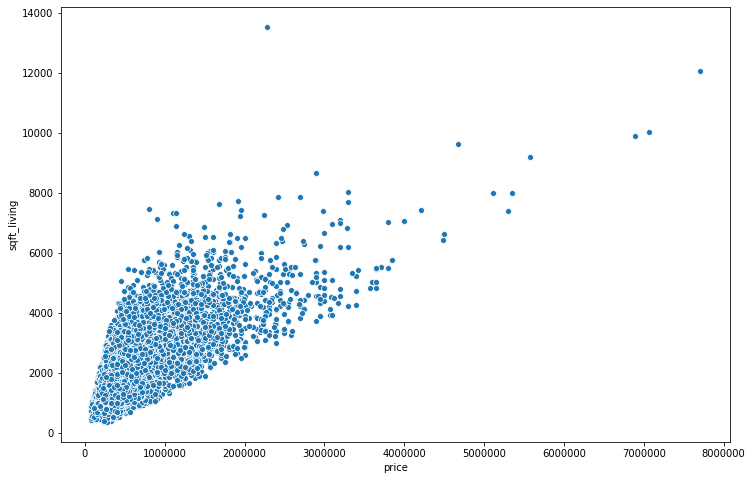

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

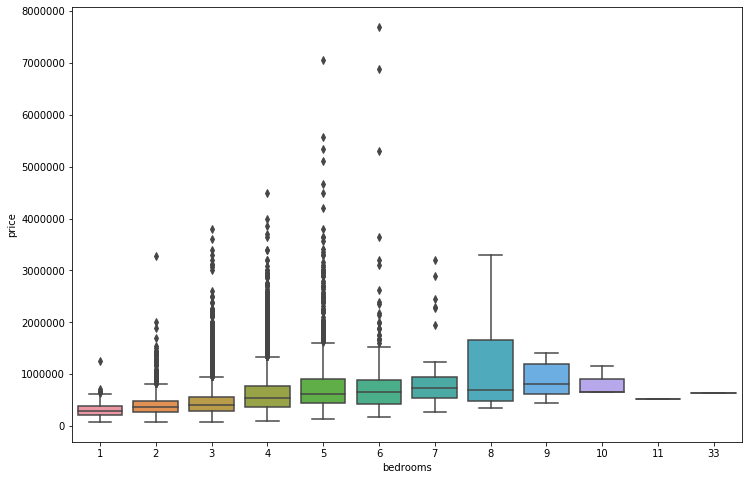

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms', y='price', data=df);

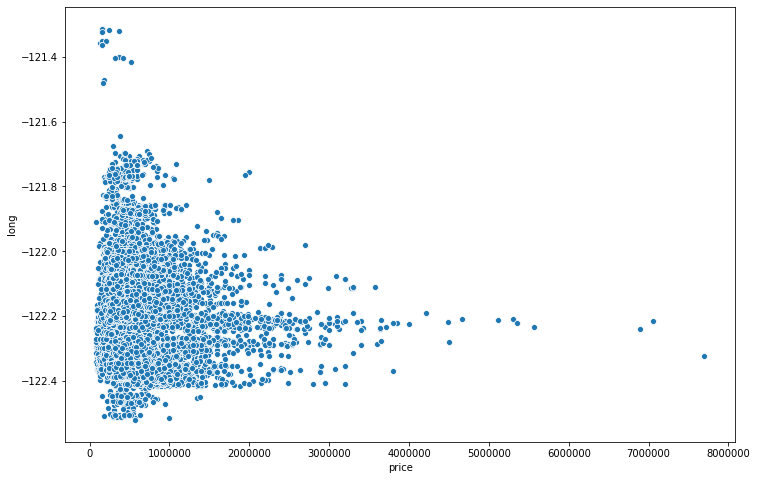

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df);  # -122.2 longitude'da cok pahali evler var

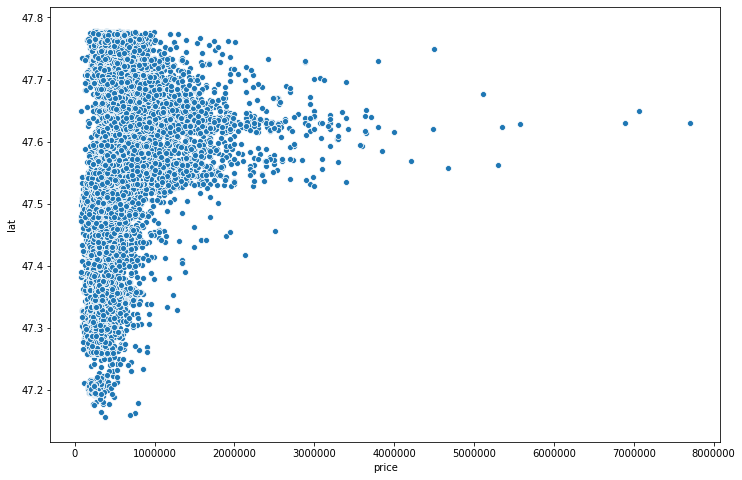

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df);

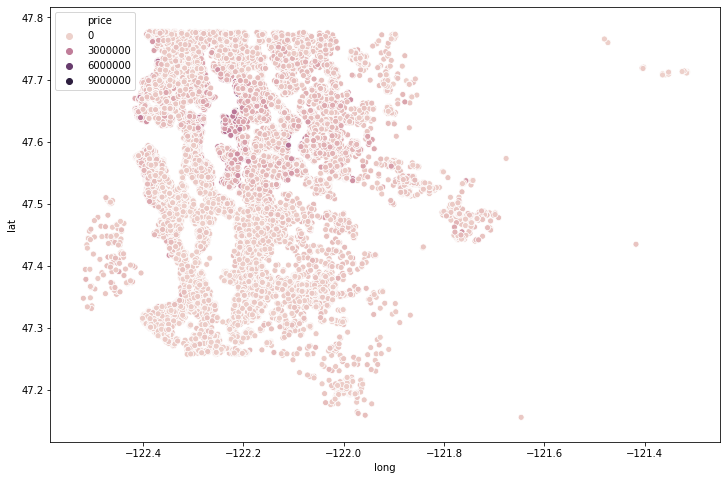

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df, hue = 'price'); # cografi harita benzero ortaya cikti

In [20]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,...,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,...,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,...,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,...,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,...,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,...,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,...,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,...,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,...,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,...,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


In [21]:
len(df)*(0.01)

215.97

In [22]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #ilk %1 fiyatli evler haric tutuluyor cok pahalilar

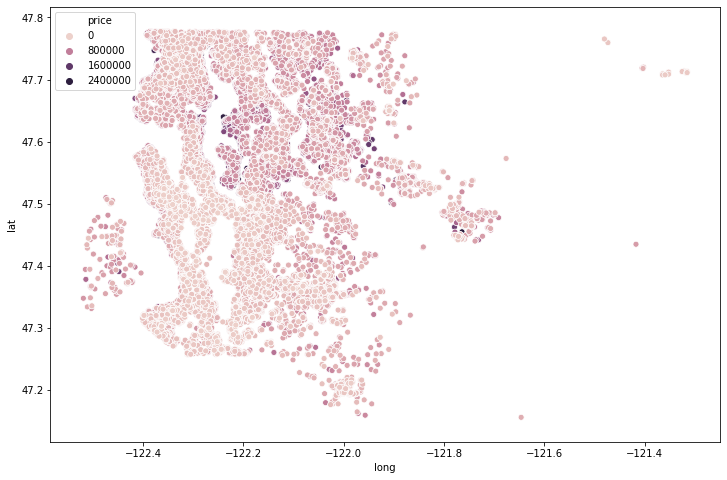

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc, hue = 'price');

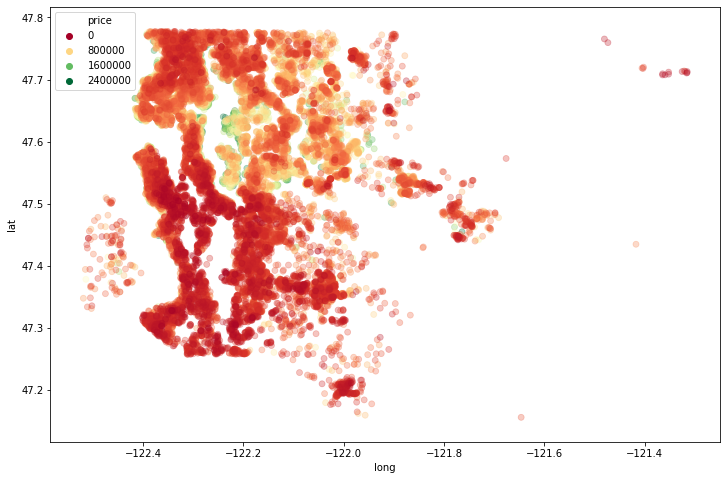

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',palette='RdYlGn',alpha=0.3,edgecolor=None);

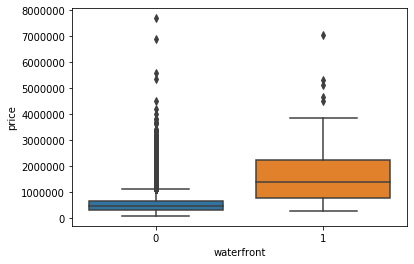

In [25]:
sns.boxplot(x='waterfront', y='price', data = df);

**Feature Engineering**

In [26]:
df = df.drop('id', axis =1)

In [27]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [28]:
df.info()  # date kullanilabilir ama DType'i object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [29]:
df['date'] = pd.to_datetime(df['date'])  # Dtype date'e donduruldu

In [30]:
df['month'] = df['date'].apply(lambda date:date.month)

In [31]:
df['year'] = df['date'].apply(lambda date:date.year)

In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,...,0,1955,0,98178,47.511,-122.257,1340,5650,10,2014
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,...,400,1951,1991,98125,47.721,-122.319,1690,7639,12,2014
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,...,0,1933,0,98028,47.738,-122.233,2720,8062,2,2015
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,...,910,1965,0,98136,47.521,-122.393,1360,5000,12,2014
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,...,0,1987,0,98074,47.617,-122.045,1800,7503,2,2015


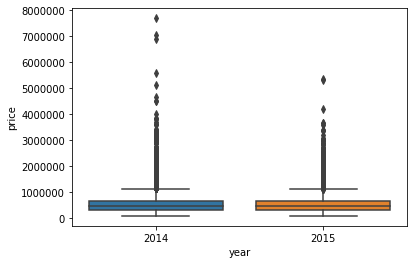

In [33]:
sns.boxplot(x='year', y='price', data = df);

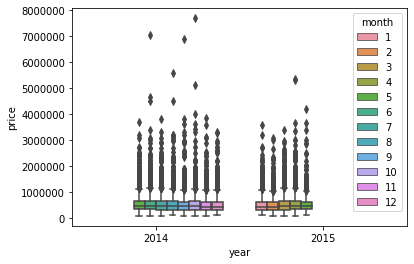

In [34]:
sns.boxplot(x='year', y='price', data = df, hue = 'month');

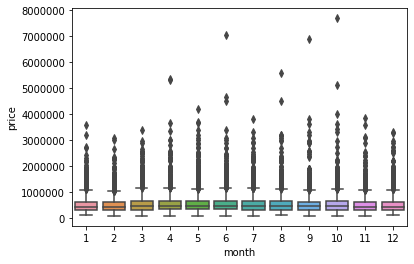

In [35]:
sns.boxplot(x='month', y='price', data = df);

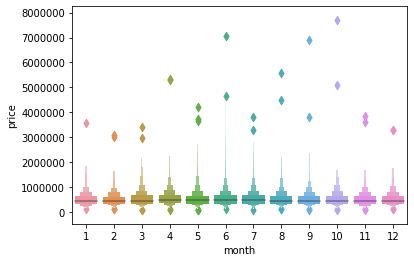

In [36]:
sns.boxenplot(x = "month", y = "price", data =df);

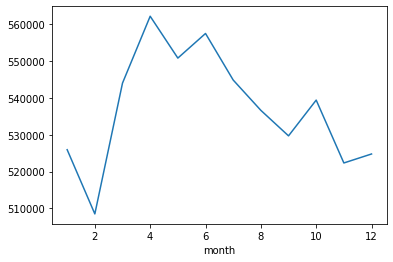

In [37]:
df.groupby('month').mean()['price'].plot();

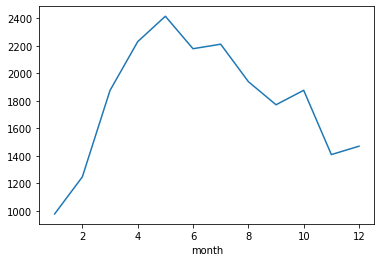

In [38]:
df.groupby('month').count()['price'].plot();  # satis sayisi

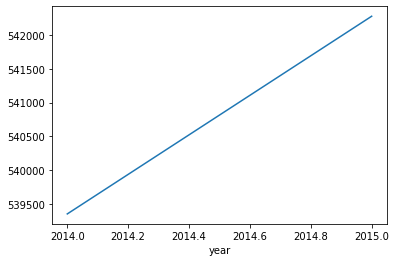

In [39]:
df.groupby('year').mean()['price'].plot();

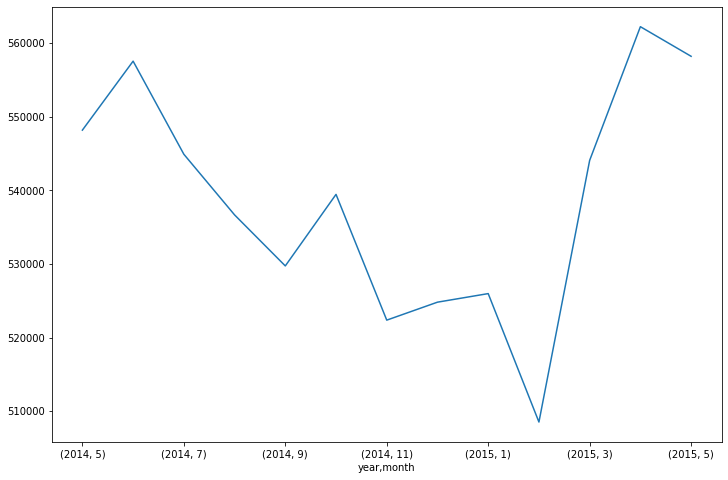

In [40]:
plt.figure(figsize=(12,8))
df.groupby(['year','month']).mean()['price'].plot();

In [41]:
df = df.drop('date', axis=1) # year ve month ayrica column'lar olusturmustuk = date'e gerek kalmadi

In [42]:
df = df.drop('zipcode', axis =1)

In [43]:
df['yr_renovated'].value_counts() # scale edilecegi icin birakilabilir - normalde 2014 ile 0 arasi fark buyuk

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
df['sqft_basement'].value_counts()  # benzer durum - basement yoksa 0 - scale edilmeli

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

**Scaling + Train-Test-Split**

In [47]:
X = df.drop('price', axis =1).values
y = df.price.values  # array haline getirdik

In [48]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)  # train datasi fazla oldugu icin onunla scale (fit) ediyoruz

In [54]:
X_test = scaler.transform(X_test)

In [55]:
X_test  # 2-D Numpy array

array([[0.2       , 0.03333333, 0.03644647, ..., 0.0088806 , 0.09090909,
        1.        ],
       [0.2       , 0.06666667, 0.08656036, ..., 0.00581357, 0.81818182,
        0.        ],
       [0.3       , 0.23333333, 0.1078208 , ..., 0.05679519, 0.18181818,
        1.        ],
       ...,
       [0.2       , 0.16666667, 0.09339408, ..., 0.00855667, 0.45454545,
        0.        ],
       [0.4       , 0.4       , 0.18147304, ..., 0.00452128, 0.63636364,
        0.        ],
       [0.1       , 0.16666667, 0.0523918 , ..., 0.01849063, 0.36363636,
        0.        ]])

Neden standart degil MinMax?? 0 ile 1 arasi degerler alir
outlier'lara gore daha hassas (az outlier varsa OK)
cok fazla Outlier varsa - robustscaler kullanilir - aykiri degerlere sahip dataset'e uygulanir (RobustScaler())

In [58]:
X_train.shape  # input layer icin girilmesi gereken feature sayisi 19

(15117, 19)

**Generating the Model**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

C:\Users\Alp\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Alp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [5]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 128, epochs = 400)

In [ ]:
model.summary()

In [63]:
!pip install pydot

In [65]:
!pip install graphviz

In [66]:
from tensorflow.keras.utils import plot_model
dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [68]:
losses = pd.DataFrame(model.history.history)

In [69]:
losses

,loss,val_loss
0,27857160192.000,29914605568.000
1,27862437888.000,29908850688.000
2,27812401152.000,29889054720.000
3,27832432640.000,29868681216.000
4,27819878400.000,29851975680.000
...,...,...
395,24608501760.000,28086669312.000
396,24599549952.000,27989313536.000
397,24568764416.000,27972972544.000
398,24558895104.000,27952357376.000


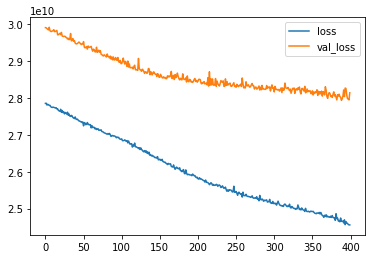

In [70]:
losses.plot();

In [ ]:
Overfitting if: training loss << validation loss
Underfitting if: training loss >> validation loss
Just right if training loss ~ validation loss

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [75]:
y_pred = model.predict(X_test)

In [76]:
mean_absolute_error(y_test, y_pred)

ValueError: y_true and y_pred have different number of output (1!=19)

In [77]:
np.sqrt(mean_squared_error(y_test,y_pred))

ValueError: y_true and y_pred have different number of output (1!=19)

In [78]:
explained_variance_score(y_test,y_pred)  #hata variance ile gercek degerlerin variance'i arasindaki fark. 1 en iyi

ValueError: y_true and y_pred have different number of output (1!=19)

ValueError: x and y must be the same size

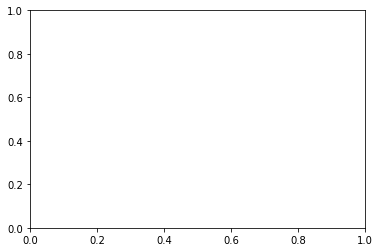

In [80]:
# Our predictions
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [81]:
single_house = df.drop('price', axis=1).iloc[0]

In [82]:
single_house

bedrooms           3.000
bathrooms          1.000
sqft_living     1180.000
sqft_lot        5650.000
floors             1.000
waterfront         0.000
view               0.000
condition          3.000
grade              7.000
sqft_above      1180.000
sqft_basement      0.000
yr_built        1955.000
yr_renovated       0.000
lat               47.511
long            -122.257
sqft_living15   1340.000
sqft_lot15      5650.000
month             10.000
year            2014.000
Name: 0, dtype: float64

In [84]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
model.predict(single_house) # hata vermesi beklenir - scale edilmezse

array([[272818.34, 272828.9 , 272864.97, 272835.47, 272847.6 , 272883.12,
        272892.66, 272826.7 , 272902.38, 272828.84, 272895.88, 272808.97,
        272846.03, 272887.66, 272896.16, 272905.56, 272816.38, 272843.97,
        272903.2 ]], dtype=float32)

In [85]:
df.iloc[0] # gercek price degeri 221900

price           221900.000
bedrooms             3.000
bathrooms            1.000
sqft_living       1180.000
sqft_lot          5650.000
floors               1.000
waterfront           0.000
view                 0.000
condition            3.000
grade                7.000
sqft_above        1180.000
sqft_basement        0.000
yr_built          1955.000
yr_renovated         0.000
lat                 47.511
long              -122.257
sqft_living15     1340.000
sqft_lot15        5650.000
month               10.000
year              2014.000
Name: 0, dtype: float64